<div style="text-align: center; font-size:30px; font-weight: bold;">
    Predicting the Future of Hotel Bookings: A Strategic Plan to Prevent Cancellations and Increase Revenue
</div>

<div style="text-align: center; font-size:20px; font-weight: bold;">
    MOH. KHISANUL FAKHRUDIN AKBAR
</div>

____

# Business Problem Understanding

## Context

Hotel ingin memprediksi kemungkinan pembatalan reservasi yang dilakukan oleh pelanggan. Pembatalan yang mendadak dapat mempengaruhi tingkat hunian dan pendapatan hotel, karena kamar yang sudah dipesan menjadi kosong dan sulit diisi kembali pada waktu singkat. Dengan data historis yang mencakup informasi tentang pelanggan, tipe kamar yang dipesan, segmen pasar, dan berbagai variabel lainnya, hotel ingin mengetahui reservasi mana yang berisiko dibatalkan. Dengan informasi ini, hotel dapat mengambil langkah pencegahan untuk meminimalkan dampak dari pembatalan.

Target `is_canceled`: 
* 0: Tidak dibatalkan
* 1: Dibatalkan

## Problem Statement:

Proses pengelolaan pembatalan reservasi dapat mempengaruhi pendapatan hotel. Tanpa mengetahui kemungkinan pembatalan, hotel akan kesulitan dalam mengoptimalkan tingkat hunian dan merencanakan strategi untuk mengatasi pembatalan yang tidak terduga. Hotel ingin memprediksi kemungkinan pembatalan reservasi untuk mengurangi kerugian dan meningkatkan efisiensi operasional. Dengan informasi yang dimiliki, seperti asal negara pelanggan, segmen pasar, jumlah pembatalan sebelumnya, perubahan dalam reservasi, dan permintaan khusus, hotel ingin meningkatkan keputusan operasional mereka dalam mengelola kamar dan strategi harga.

Contoh Kasus: <br>
Misalkan ada seorang pelanggan yang memesan kamar dengan harga $150 per malam untuk menginap selama 1 malam. Jika pembatalan terjadi, hotel tidak hanya kehilangan pendapatan $150 dari reservasi tersebut, tetapi juga harus menanggung biaya operasional yang tetap tanpa pendapatan yang dihasilkan. Selain itu, hotel juga harus menginvestasikan waktu dan sumber daya untuk mencoba mengisi kembali kamar tersebut dengan pelanggan lain dalam waktu yang singkat yang kemungkinan sulit mendapatkan pelanggan jika terlalu mendadak.

Oleh karena itu, hotel ingin memprediksi kemungkinan pembatalan reservasi untuk mengurangi kerugian dan meningkatkan efisiensi operasional, serta meningkatkan keputusan operasional mereka dalam mengelola kamar dan strategi harga.

## Goals

Berdasarkan masalah ini, hotel ingin memiliki kemampuan untuk memprediksi kemungkinan pembatalan pada setiap reservasi yang dilakukan. Dengan demikian, hotel dapat lebih fokus pada pelanggan yang berisiko tinggi membatalkan reservasi dan mengambil tindakan preventif, seperti menawarkan diskon atau pengingat khusus, untuk meminimalkan pembatalan.

Hotel juga ingin memahami faktor-faktor yang berkontribusi pada pembatalan, agar dapat merancang kebijakan harga dan promosi yang lebih efektif, serta meningkatkan kepuasan pelanggan untuk mencegah pembatalan di masa depan.

## Analytic Approach

Hotel akan menganalisis data untuk menemukan pola-pola yang membedakan antara reservasi yang dibatalkan dan yang tidak dibatalkan. Kemudian, model klasifikasi akan dibangun untuk memprediksi probabilitas pembatalan suatu reservasi berdasarkan fitur yang ada, seperti tipe kamar, segmen pasar, atau status deposit. Model ini diharapkan dapat memberikan wawasan lebih dalam untuk pengelolaan tingkat hunian kamar yang lebih efisien.

Keuntungan untuk Stakeholder Internal Hotel:
* **Manajemen Hotel**: Dapat merencanakan dan mengelola tingkat hunian lebih baik dengan mengetahui reservasi yang berisiko dibatalkan. Langkah pencegahan dapat diambil lebih awal, sehingga tingkat hunian dapat dipertahankan dan pendapatan lebih optimal.
* **Tim Pemasaran**: Bisa menargetkan pelanggan yang berisiko tinggi membatalkan dan memberikan insentif atau promosi untuk mengurangi pembatalan. Ini akan meningkatkan kepuasan pelanggan dan mengurangi biaya akibat pembatalan mendadak.
* **Tim Operasional**: Dapat mempersiapkan sumber daya dan strategi operasional untuk mengelola kamar yang berisiko kosong, serta meningkatkan respons terhadap pembatalan yang terdeteksi.

## Metric Evaluation

**False Positive** (Type 1 Error): 
* Model salah mengidentifikasi reservasi yang sebenarnya tidak akan dibatalkan, sehingga hotel menghabiskan waktu dan sumber daya (seperti memberikan diskon atau penawaran) kepada pelanggan yang sebenarnya tidak berisiko membatalkan. Meskipun ini menambah biaya, dampaknya tidak sebesar kehilangan pendapatan dari False Negative.

**False Negative** (Type 2 Error):
* Ketika model gagal mengidentifikasi reservasi yang berisiko dibatalkan, hotel tidak dapat mengambil tindakan pencegahan. Akibatnya, hotel kehilangan pendapatan dari reservasi yang dibatalkan dan kamar tetap kosong.

Metrik Utama: <br>
Karena fokus pada pengurangan **False Negative**, metrik utama yang digunakan adalah **Recall**, yang mengukur seberapa banyak pembatalan yang dapat terdeteksi oleh model. Dengan meningkatkan Recall, hotel dapat meminimalkan kerugian pendapatan akibat pembatalan yang tidak terdeteksi.
Sebaliknya, jika model lebih fokus pada False Positive (misalnya, dengan meningkatkan Precision), meskipun lebih sedikit sumber daya yang terbuang, **False Negative** (yaitu pembatalan yang tidak terdeteksi) bisa meningkat, yang berarti lebih banyak pendapatan yang hilang akibat pembatalan yang tidak diprediksi.

In [204]:
# cleaning
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# preparation
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler,FunctionTransformer
from category_encoders import BinaryEncoder
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin

# Model Selection
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from imblearn.pipeline import Pipeline as imb_pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss



In [205]:
df = pd.read_csv("../data/raw/data_hotel_booking_demand.csv")
df.head()

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0


In [206]:
display(df.describe(), df.describe(include="O"))

,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled
count,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000
mean,0.086798,0.220897,2.330561,0.062999,0.573211,0.368277
std,0.841011,0.648635,17.673051,0.246919,0.795163,0.482340
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,26.000000,21.000000,391.000000,8.000000,5.000000,1.000000


,country,market_segment,deposit_type,customer_type,reserved_room_type
count,83222,83573,83573,83573,83573
unique,162,8,3,4,10
top,PRT,Online TA,No Deposit,Transient,A
freq,34097,39460,73352,62732,60041


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      83222 non-null  object
 1   market_segment               83573 non-null  object
 2   previous_cancellations       83573 non-null  int64 
 3   booking_changes              83573 non-null  int64 
 4   deposit_type                 83573 non-null  object
 5   days_in_waiting_list         83573 non-null  int64 
 6   customer_type                83573 non-null  object
 7   reserved_room_type           83573 non-null  object
 8   required_car_parking_spaces  83573 non-null  int64 
 9   total_of_special_requests    83573 non-null  int64 
 10  is_canceled                  83573 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 7.0+ MB


In [208]:
def cek_data(df, expand=False):

    if expand:
        pd.set_option('display.max_colwidth', None)
    else:
        pd.reset_option('display.max_colwidth')

    df_status = pd.DataFrame()
    df_status["Column"] = df.columns
    df_status["Dtype"] = df.dtypes.values
    df_status["Null"] = df.isnull().sum().values
    df_status["Null"] = df_status["Null"].apply(lambda x: f"{x} ({x/len(df):.2%})")
    df_status["Unique Count"] = df.nunique().values
    df_status["Unique Sample"] = [df[col].unique() for col in df.columns]

    return df_status

In [209]:
cek_data(df,True)

,Column,Dtype,Null,Unique Count,Unique Sample
0,country,object,351 (0.42%),162,"[IRL, FRA, PRT, NLD, ESP, UMI, CN, LUX, BRA, BEL, JPN, DEU, ITA, CHE, GBR, AGO, SRB, COL, CHN, SWE, AUT, CIV, CZE, POL, USA, SGP, RUS, ROU, DNK, IND, MAR, PHL, ARG, ISL, ZAF, LBN, MOZ, TUR, BGD, MEX, CAF, NOR, FIN, UKR, EGY, ISR, nan, KOR, AZE, HUN, AUS, EST, CHL, SVN, PRY, ABW, ALB, LTU, ARE, HRV, SAU, NZL, LVA, ATA, KAZ, DZA, TWN, CRI, BIH, BGR, IRQ, OMN, VEN, IDN, GEO, MLT, IRN, BLR, URY, LBY, TUN, BEN, MYS, MWI, GRC, CYP, CPV, HKG, PRI, MKD, MUS, IMN, PAN, NGA, GLP, KHM, PER, QAT, SEN, MAC, ...]"
1,market_segment,object,0 (0.00%),8,"[Offline TA/TO, Online TA, Direct, Groups, Corporate, Complementary, Aviation, Undefined]"
2,previous_cancellations,int64,0 (0.00%),15,"[0, 1, 25, 2, 3, 11, 24, 13, 6, 26, 14, 4, 19, 5, 21]"
3,booking_changes,int64,0 (0.00%),19,"[0, 1, 2, 5, 3, 4, 6, 7, 9, 8, 17, 10, 13, 12, 14, 21, 16, 20, 15]"
4,deposit_type,object,0 (0.00%),3,"[No Deposit, Non Refund, Refundable]"
5,days_in_waiting_list,int64,0 (0.00%),115,"[0, 3, 39, 87, 77, 215, 97, 162, 46, 79, 4, 31, 122, 34, 57, 259, 50, 17, 32, 43, 75, 69, 44, 22, 113, 58, 38, 65, 48, 236, 176, 25, 108, 91, 19, 160, 68, 28, 63, 35, 42, 59, 24, 8, 183, 187, 21, 111, 56, 98, 101, 15, 16, 47, 93, 45, 14, 70, 10, 49, 178, 99, 60, 40, 85, 223, 6, 33, 391, 20, 1, 41, 147, 55, 80, 379, 150, 61, 330, 174, 107, 96, 18, 62, 13, 30, 120, 27, 207, 71, 2, 76, 125, 5, 9, 224, 53, 83, 84, 12, ...]"
6,customer_type,object,0 (0.00%),4,"[Transient-Party, Transient, Contract, Group]"
7,reserved_room_type,object,0 (0.00%),10,"[A, E, D, F, B, G, C, H, L, P]"
8,required_car_parking_spaces,int64,0 (0.00%),5,"[0, 1, 2, 8, 3]"
9,total_of_special_requests,int64,0 (0.00%),6,"[0, 2, 1, 3, 4, 5]"


# Cleaning

## market_segment

In [210]:
df["market_segment"].value_counts()

market_segment
Online TA        39460
Offline TA/TO    17025
Groups           13721
Direct            8898
Corporate         3792
Complementary      511
Aviation           165
Undefined            1
Name: count, dtype: int64

In [211]:
# drop market segment yang memiliki nilai Undefined, karena segmennya tidak diketahui
df[(df["market_segment"]=="Undefined")]

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
70217,PRT,Undefined,0,0,No Deposit,0,Transient-Party,B,0,1,1


In [212]:
df.drop(index=70217, inplace=True)

In [213]:
df["market_segment"].value_counts()

market_segment
Online TA        39460
Offline TA/TO    17025
Groups           13721
Direct            8898
Corporate         3792
Complementary      511
Aviation           165
Name: count, dtype: int64

In [214]:
df.head()

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0


## country

In [215]:
# Cek jika ada kode negara yang panjang karakternya lebih dari 3
[val for val in df["country"].unique() if len(str(val))>3 ]

[]

In [216]:
df[df["country"].isna()]

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
814,NaN,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1166,NaN,Direct,2,0,No Deposit,0,Transient,E,0,3,1
1304,NaN,Direct,0,1,No Deposit,0,Transient,D,0,1,0
1661,NaN,Corporate,0,0,No Deposit,0,Transient,A,0,0,0
2182,NaN,Corporate,0,0,No Deposit,0,Transient,A,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
82466,NaN,Offline TA/TO,0,0,No Deposit,0,Transient,A,0,0,0
83084,NaN,Corporate,0,0,No Deposit,0,Transient,A,0,0,0
83106,NaN,Direct,0,0,No Deposit,0,Transient,A,0,2,0
83353,NaN,Direct,0,0,No Deposit,0,Transient,A,0,0,0


In [217]:
print("Modus country berdasarkan market segment :")
df.groupby(['market_segment'])['country'].describe()["top"]

Modus country berdasarkan market segment :


market_segment
Aviation         PRT
Complementary    PRT
Corporate        PRT
Direct           PRT
Groups           PRT
Offline TA/TO    PRT
Online TA        PRT
Name: top, dtype: object

In [218]:
print("Modus country berdasarkan customer type :")
df.groupby(['customer_type'])['country'].describe()["top"]

Modus country berdasarkan customer type :


customer_type
Contract           PRT
Group              PRT
Transient          PRT
Transient-Party    PRT
Name: top, dtype: object

Nilai kosong pada kolom `country` sebanyak 351 baris (0.42%) tergolong sangat kecil dan tidak signifikan secara statistik. Hasil analisis menunjukkan bahwa modus `country` untuk seluruh data, serta dalam setiap kategori `market_segment` dan `customer_type`, adalah `'PRT'` (Portugal). Ini menandakan dominasi konsisten tamu lokal dalam seluruh segmen pelanggan. Oleh karena itu, imputasi nilai kosong dengan `'PRT'` adalah pilihan yang tepat karena merepresentasikan pola dominan secara menyeluruh, meminimalkan potensi bias, dan menjaga kesederhanaan tanpa mengorbankan validitas data.

In [219]:
df['country'] = df['country'].fillna(df['country'].mode()[0])

## duplicate

In [220]:
print("Jumlah data :", len(df))
print(f"Jumlah duplikat : {df.duplicated().sum()} ({df.duplicated().sum()/len(df):.2%})" )

Jumlah data : 83572
Jumlah duplikat : 73476 (87.92%)


In [221]:
print(f"Data sebelum drop: {len(df)}")
print(f"Data setelah drop: {len(df.drop_duplicates())}")

Data sebelum drop: 83572
Data setelah drop: 10096


Menghapus baris yang benar-benar identik adalah langkah yang aman dan disarankan karena duplikat penuh tidak menambah informasi, justru meningkatkan risiko overfitting, membuang resource komputasi, dan dapat mengacaukan distribusi statistik dalam analisis maupun pelatihan model.

In [222]:
df.drop_duplicates(inplace=True)

​Menghapus data duplikat dalam dataset machine learning dapat diterima dan sering kali diperlukan untuk meningkatkan kualitas model. Duplikat dapat menyebabkan model "mempelajari" informasi yang sama berulang kali, yang berisiko menyebabkan overfitting—model terlalu menyesuaikan diri dengan data pelatihan dan gagal menggeneralisasi dengan baik ke data baru. Sebagai contoh, penelitian oleh [Lee et al. (2021)](https://arxiv.org/abs/2107.06499) menunjukkan bahwa menghapus duplikat dalam dataset pelatihan dapat mengurangi frekuensi model menyalin teks secara verbatim, meningkatkan akurasi, dan mempercepat konvergensi pelatihan.

In [223]:
cek_data(df)

,Column,Dtype,Null,Unique Count,Unique Sample
0,country,object,0 (0.00%),162,"[IRL, FRA, PRT, NLD, ESP, UMI, CN, LUX, BRA, B..."
1,market_segment,object,0 (0.00%),7,"[Offline TA/TO, Online TA, Direct, Groups, Cor..."
2,previous_cancellations,int64,0 (0.00%),15,"[0, 1, 25, 2, 3, 11, 24, 13, 6, 26, 14, 4, 19,..."
3,booking_changes,int64,0 (0.00%),19,"[0, 1, 2, 5, 3, 4, 6, 7, 9, 8, 17, 10, 13, 12,..."
4,deposit_type,object,0 (0.00%),3,"[No Deposit, Non Refund, Refundable]"
5,days_in_waiting_list,int64,0 (0.00%),115,"[0, 3, 39, 87, 77, 215, 97, 162, 46, 79, 4, 31..."
6,customer_type,object,0 (0.00%),4,"[Transient-Party, Transient, Contract, Group]"
7,reserved_room_type,object,0 (0.00%),10,"[A, E, D, F, B, G, C, H, L, P]"
8,required_car_parking_spaces,int64,0 (0.00%),5,"[0, 1, 2, 8, 3]"
9,total_of_special_requests,int64,0 (0.00%),6,"[0, 2, 1, 3, 4, 5]"


# Data Exploration

## Numeric Variable

In [224]:
cek_num = cek_data(df)
cek_num = cek_num[cek_num["Dtype"]!="object"]
cek_num["Min"] = [val for val in df.describe().T["min"].values]
cek_num["Med"] = [val for val in df.describe().T["50%"].values]
cek_num["Max"] = [val for val in df.describe().T["max"].values]

cek_num

,Column,Dtype,Null,Unique Count,Unique Sample,Min,Med,Max
2,previous_cancellations,int64,0 (0.00%),15,"[0, 1, 25, 2, 3, 11, 24, 13, 6, 26, 14, 4, 19,...",0.0,0.0,26.0
3,booking_changes,int64,0 (0.00%),19,"[0, 1, 2, 5, 3, 4, 6, 7, 9, 8, 17, 10, 13, 12,...",0.0,0.0,21.0
5,days_in_waiting_list,int64,0 (0.00%),115,"[0, 3, 39, 87, 77, 215, 97, 162, 46, 79, 4, 31...",0.0,0.0,391.0
8,required_car_parking_spaces,int64,0 (0.00%),5,"[0, 1, 2, 8, 3]",0.0,0.0,8.0
9,total_of_special_requests,int64,0 (0.00%),6,"[0, 2, 1, 3, 4, 5]",0.0,1.0,5.0
10,is_canceled,int64,0 (0.00%),2,"[0, 1]",0.0,0.0,1.0


In [225]:
numeric_var = df.select_dtypes(include="number")

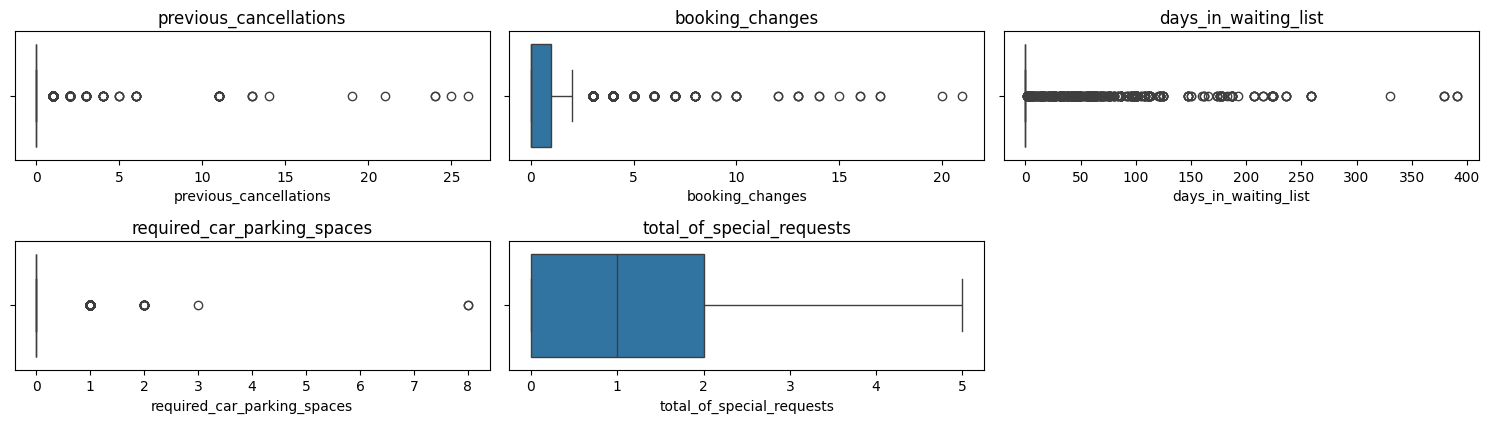

In [226]:
x_num = list(numeric_var.columns.drop("is_canceled"))


plt.figure(figsize=(15,6))

for i, feat in enumerate(x_num,1):

    plt.subplot(3,3,i)
    sns.boxplot(data=df, x=feat)
    plt.title(feat)
    plt.tight_layout()


Hampir semua variabel menunjukkan kehadiran outlier, terutama pada days_in_waiting_list yang memiliki sebaran data luas hingga mendekati 400 hari, dan booking_changes yang mencapai lebih dari 20 kali perubahan. Sebagian besar nilai dari previous_cancellations dan required_car_parking_spaces terkonsentrasi di angka nol, menunjukkan bahwa sebagian besar tamu tidak pernah membatalkan sebelumnya dan tidak membutuhkan tempat parkir. Sementara itu, total_of_special_requests memiliki distribusi lebih merata hingga nilai maksimum 5, menunjukkan adanya variasi dalam permintaan khusus dari tamu.

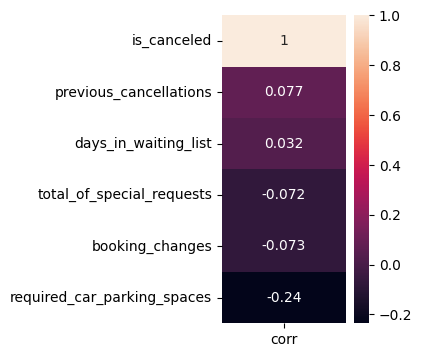

In [227]:
# Cek Korelasi numeric feature terhadap target
corr_matrix = numeric_var.corrwith(df['is_canceled']).sort_values(ascending=False)
corr_matrix = corr_matrix.to_frame('corr')

plt.figure(figsize=(2, 4))
sns.heatmap(corr_matrix, annot=True)
plt.show()

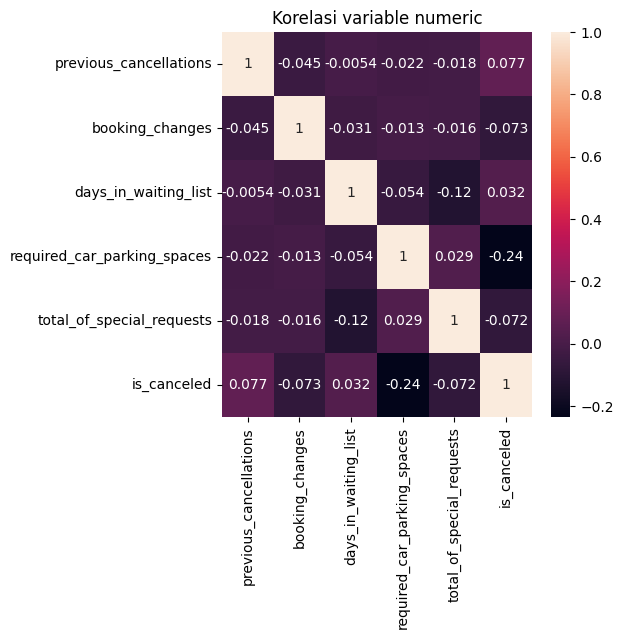

In [228]:
feature_corr = numeric_var.corr()

plt.figure(figsize=(5, 5))
sns.heatmap(numeric_var.corr(), annot=True)
plt.title("Korelasi variable numeric")
plt.show()

nilai korelasi absolut antara fitur numerik dan target `is_canceled` semuanya tergolong lemah, dengan nilai tertinggi adalah `required_car_parking_spaces` sebesar -0.24, yang menunjukkan bahwa tamu yang membutuhkan parkir cenderung tidak membatalkan reservasi. Meskipun nilainya di bawah ambang korelasi lemah (0.3). 

https://www.datacamp.com/tutorial/tutorial-datails-on-correlation

## Categorical Variable

In [229]:
# Cek Cardinality (Cek banyak katerori setiap variabel kategorik)
# Banyak kategori -> High Cardinality (model susah dalam mempelajari pola)

categorical_var = df.select_dtypes(include='object')
categorical_var.nunique().sort_values(ascending=False)

country               162
reserved_room_type     10
market_segment          7
customer_type           4
deposit_type            3
dtype: int64

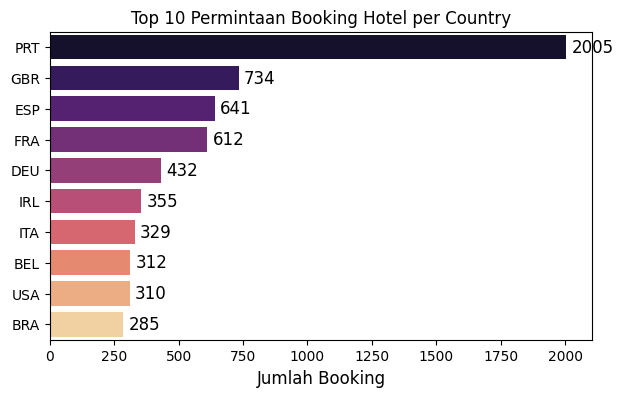

In [230]:
top_n = 10
top_country = df["country"].value_counts().head(top_n)

plt.figure(figsize=(7, 4))
ax = sns.barplot(x=top_country.values, y=top_country.index, hue=top_country.index, palette="magma", legend=False)

# Menambahkan label nilai di atas setiap batang
for index, value in enumerate(top_country.values):
    plt.text(value + 20 , index, str(value), color="black", va="center", fontsize=12)

# Menambahkan judul dan label
plt.title(f"Top {top_n} Permintaan Booking Hotel per Country", fontsize=12)
plt.xlabel("Jumlah Booking", fontsize=12)
plt.ylabel("")

# Menampilkan plot
plt.show()

In [231]:
df.describe(include="O").T

,count,unique,top,freq
country,10096,162,PRT,2005
market_segment,10096,7,Online TA,4924
deposit_type,10096,3,No Deposit,9855
customer_type,10096,4,Transient,6825
reserved_room_type,10096,10,A,4566


In [232]:
segment	 = pd.crosstab(df["market_segment"], df["is_canceled"])
segment

is_canceled,0,1
market_segment,,
Aviation,64,17
Complementary,152,29
Corporate,435,73
Direct,1702,385
Groups,696,149
Offline TA/TO,1253,217
Online TA,3390,1534


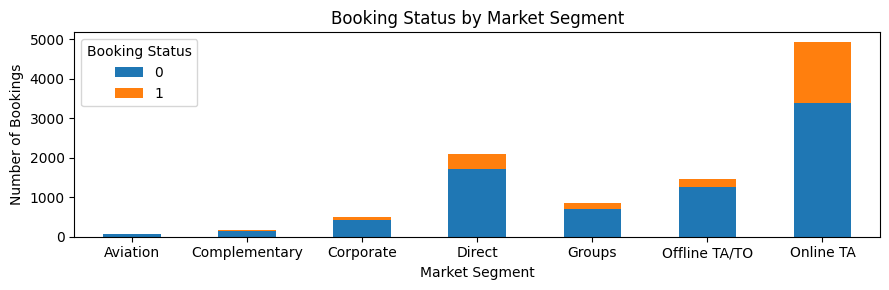

In [233]:
segment.plot(kind='bar', stacked=True, figsize=(9, 3), color=['#1f77b4', '#ff7f0e'])
plt.title('Booking Status by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Number of Bookings')
plt.legend(title='Booking Status')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Online TA (Travel Agents) memiliki jumlah reservasi tertinggi yaitu 4.924 dengan 1.534 di antaranya dibatalkan, sehingga sekitar 31.2% dari reservasi di segmen ini mengalami pembatalan. Segmen Direct memiliki total 2.087 reservasi dengan 385 pembatalan (18.4%), sementara Offline TA/TO mencatat 1.470 reservasi dengan 217 pembatalan (14.8%). Segmen Groups memiliki tingkat pembatalan 17.6% (149 dari 845), dan Corporate sebesar 14.4% (73 dari 508). Segmen dengan tingkat pembatalan paling rendah adalah Aviation, dengan hanya 17 pembatalan dari total 81 reservasi (21.0%), dan Complementary dengan 29 dari 181 (16.0%). Hal ini menunjukkan bahwa pemesanan melalui agen online memiliki risiko pembatalan tertinggi, sedangkan metode seperti corporate atau offline agency cenderung lebih stabil dan andal.

## Target Distribution

In [234]:
target_count = df["is_canceled"].value_counts()

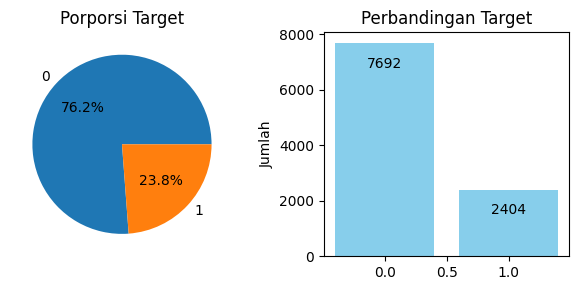

In [235]:
# Membuat figure dan axis
fig, axs = plt.subplots(1, 2, figsize=(6, 3))  # 1 baris, 2 kolom

# Pie chart
axs[0].pie(x=target_count.values, labels=target_count.index, autopct='%1.1f%%')
axs[0].set_title("Porporsi Target")

# Bar chart
axs[1].bar(target_count.index, target_count.values, color='skyblue')
axs[1].set_title("Perbandingan Target")
axs[1].set_ylabel("Jumlah")

# Menambahkan label pada bar chart
for i, v in enumerate(target_count.values):
    axs[1].text(i, v - 1000, str(v), ha='center', va='bottom')


# Menampilkan plot
plt.tight_layout()
plt.show()

mayoritas data memiliki nilai target 0, yaitu sebesar 76,2%, sedangkan hanya 23,8% yang bernilai 1. Hal ini mengindikasikan ketidak seimbangan kelas (class imbalance) dalam variabel target, yang dapat memengaruhi kinerja model prediksi jika tidak ditangani

# Data Preparation

In [236]:
cek_obj = cek_data(df)
cek_obj = cek_obj[cek_obj["Dtype"]=="object"]
cek_obj.reset_index(drop=True)

,Column,Dtype,Null,Unique Count,Unique Sample
0,country,object,0 (0.00%),162,"[IRL, FRA, PRT, NLD, ESP, UMI, CN, LUX, BRA, B..."
1,market_segment,object,0 (0.00%),7,"[Offline TA/TO, Online TA, Direct, Groups, Cor..."
2,deposit_type,object,0 (0.00%),3,"[No Deposit, Non Refund, Refundable]"
3,customer_type,object,0 (0.00%),4,"[Transient-Party, Transient, Contract, Group]"
4,reserved_room_type,object,0 (0.00%),10,"[A, E, D, F, B, G, C, H, L, P]"


Analisis Encoding yang cocok berdasarkan jenis data :
1. Fitur `country` memiliki 162 kategori unik dan bersifat non-ordinal, sehingga tidak cocok untuk One Hot Encoding karena akan menghasilkan terlalu banyak fitur baru. Oleh karena itu, **Binary Encoding** merupakan pilihan terbaik untuk mengurangi dimensi sambil tetap mempertahankan informasi kategorikal.
1. Fitur `market_segment` memiliki 7 kategori unik dan tidak memiliki urutan atau skala tertentu. Karena jumlah kategorinya relatif sedikit, maka **One Hot Encoding** adalah metode yang cocok untuk representasi fitur ini.
1. Fitur `deposit_type` hanya memiliki 3 kategori dan tidak bersifat ordinal. Oleh karena itu, **One Hot Encoding** sangat sesuai karena tidak akan menghasilkan banyak fitur tambahan.
1. Fitur `customer_type` memiliki 4 kategori yang tidak memiliki urutan alami, sehingga **One Hot Encoding** dapat digunakan untuk memberikan representasi yang jelas terhadap setiap kategori tanpa asumsi skala.
1. Fitur `reserved_room_type` memiliki 10 kategori unik, huruf A, B, C, dst. adalah kode untuk tipe kamar, kita tidak tahu apakah kamar "A" lebih baik atau lebih buruk dari kamar "B". Huruf-huruf tersebut hanyalah label yang digunakan sebagai penanda, bukan representasi dari urutan kualitas atau harga. Untuk menjaga interpretabilitas dan performa model, **One Hot Encoding** tetap layak digunakan di sini.

In [237]:
cek_num = cek_data(df)
cek_num = cek_num[cek_num["Dtype"]!="object"]
cek_num["Min"] = [val for val in df.describe().T["min"].values]
cek_num["Med"] = [val for val in df.describe().T["50%"].values]
cek_num["Max"] = [val for val in df.describe().T["max"].values]

cek_num.drop(index=10).reset_index(drop=True)

,Column,Dtype,Null,Unique Count,Unique Sample,Min,Med,Max
0,previous_cancellations,int64,0 (0.00%),15,"[0, 1, 25, 2, 3, 11, 24, 13, 6, 26, 14, 4, 19,...",0.0,0.0,26.0
1,booking_changes,int64,0 (0.00%),19,"[0, 1, 2, 5, 3, 4, 6, 7, 9, 8, 17, 10, 13, 12,...",0.0,0.0,21.0
2,days_in_waiting_list,int64,0 (0.00%),115,"[0, 3, 39, 87, 77, 215, 97, 162, 46, 79, 4, 31...",0.0,0.0,391.0
3,required_car_parking_spaces,int64,0 (0.00%),5,"[0, 1, 2, 8, 3]",0.0,0.0,8.0
4,total_of_special_requests,int64,0 (0.00%),6,"[0, 2, 1, 3, 4, 5]",0.0,1.0,5.0


Penggunaan RobustScaler cocok untuk semua fitur numerik karena dapat menangani distribusi skewed dan outlier dengan baik, terutama pada fitur seperti `previous_cancellations` dan `days_in_waiting_list`. Meskipun beberapa fitur memiliki rentang kecil, penggunaan RobustScaler tetap aman dan memberikan konsistensi dalam preprocessing tanpa mengganggu struktur data.

In [238]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['market_segment','deposit_type', 'customer_type', 'reserved_room_type']),
    ('binary', BinaryEncoder(), ['country']),
    ("robust",RobustScaler(),  ['previous_cancellations', 'booking_changes', 'days_in_waiting_list', 
                                'required_car_parking_spaces','total_of_special_requests'])
], remainder='passthrough', verbose_feature_names_out=False)



In [239]:
x = df.drop(columns=['is_canceled'])
y = df['is_canceled']

In [240]:
x_train,x_test,y_train,y_test=train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

In [241]:
preview = pd.DataFrame(transformer.fit_transform(x_train),columns=transformer.get_feature_names_out())
preview.head()

,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,...,country_3,country_4,country_5,country_6,country_7,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.5
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.5
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.5
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


# Model & Evaluation

In [242]:
rs = 42

# Daftar model dan namanya
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=rs),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=rs),
    'Random Forest': RandomForestClassifier(random_state=rs),
    'XGBoost': XGBClassifier(random_state=rs),
    'LightGBM': lgb.LGBMClassifier(random_state=rs)
}


## Model Benchmarking StratifiedKFold (imbalance)

In [243]:
def kfold_eval(models, model_pipeline, x_train, y_train, n_split=5):
    benchmark_result = {
        "model_name": [],
        "model_object": [],
        "mean_accuracy_train": [],
        "std_accuracy_train": [],
        "mean_accuracy_test": [],
        "std_accuracy_test": [],
        "mean_recall_train": [],
        "std_recall_train": [],
        "mean_recall_test": [],
        "std_recall_test": []}

    for name, model in models.items():
        model_pipeline.set_params(Model=model)
        result = cross_validate(estimator=model_pipeline,
                                X=x_train, y=y_train,
                                scoring=["accuracy", "recall"],
                                cv = StratifiedKFold(n_splits=n_split, shuffle=True, random_state=rs),
                                return_train_score=True,
                                return_estimator=True)
        
        benchmark_result["model_name"].append(name)
        benchmark_result["model_object"].append(model)
        
        benchmark_result["mean_accuracy_train"].append(np.mean(result["train_accuracy"]))
        benchmark_result["std_accuracy_train"].append(np.std(result["train_accuracy"]))
        benchmark_result["mean_accuracy_test"].append(np.mean(result["test_accuracy"]))
        benchmark_result["std_accuracy_test"].append(np.std(result["test_accuracy"]))
        
        benchmark_result["mean_recall_train"].append(np.mean(result["train_recall"]))
        benchmark_result["std_recall_train"].append(np.std(result["train_recall"]))
        benchmark_result["mean_recall_test"].append(np.mean(result["test_recall"]))
        benchmark_result["std_recall_test"].append(np.std(result["test_recall"]))

    benchmark_result["accuracy_gap"] = np.array(benchmark_result["mean_accuracy_train"]) - np.array(benchmark_result["mean_accuracy_test"])
    benchmark_result["recall_gap"] = np.array(benchmark_result["mean_recall_train"]) - np.array(benchmark_result["mean_recall_test"])
    benchmark_result_df = pd.DataFrame(benchmark_result)
        
    return benchmark_result_df

In [244]:
model_pipeline_1 = Pipeline(steps=[
    ("Feature Engineering", transformer),
    ("Model", None) # Model akan terisi otomatis dari function
])

results = kfold_eval(models, model_pipeline_1, x_train, y_train, n_split=5)

[LightGBM] [Info] Number of positive: 1538, number of negative: 4922
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000286 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 6460, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.238080 -> initscore=-1.163232
[LightGBM] [Info] Start training from score -1.163232
[LightGBM] [Info] Number of positive: 1539, number of negative: 4922
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000257 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 151
[LightGBM] [Info] Number of data points in the train set: 6461, number of used features: 31
[LightGBM] [Info] [binary:

c:\Users\Khisan\anaconda3\envs\jcds0512\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Khisan\anaconda3\envs\jcds0512\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Khisan\anaconda3\envs\jcds0512\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Khisan\anaconda3\envs\jcds0512\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Khisan\anaconda3\envs\jcds0512\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fit

[LightGBM] [Info] Number of positive: 1538, number of negative: 4923
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000233 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 6461, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.238044 -> initscore=-1.163435
[LightGBM] [Info] Start training from score -1.163435
[LightGBM] [Info] Number of positive: 1538, number of negative: 4923
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000310 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 154
[LightGBM] [Info] Number of data points in the train set: 6461, number of used features: 31
[LightGBM] [Info] [binary:

In [245]:
results.sort_values(by=["mean_recall_test", "recall_gap"], ascending=[False, True])

,model_name,model_object,mean_accuracy_train,std_accuracy_train,mean_accuracy_test,std_accuracy_test,mean_recall_train,std_recall_train,mean_recall_test,std_recall_test,accuracy_gap,recall_gap
4,XGBoost,"XGBClassifier(base_score=None, booster=None, c...",0.835995,0.004033,0.773278,0.006073,0.478029,0.017663,0.345290,0.023096,0.062717,0.132739
5,LightGBM,LGBMClassifier(random_state=42),0.824170,0.002296,0.779841,0.007182,0.421216,0.013048,0.322397,0.018766,0.044330,0.098819
1,KNN,KNeighborsClassifier(),0.827359,0.001667,0.731797,0.011575,0.518462,0.006318,0.316146,0.030246,0.095562,0.202316
2,Decision Tree,DecisionTreeClassifier(random_state=42),0.912921,0.001195,0.673973,0.008379,0.634296,0.004963,0.288609,0.015190,0.238948,0.345687
3,Random Forest,RandomForestClassifier(random_state=42),0.912921,0.001195,0.696631,0.007180,0.769763,0.008063,0.284958,0.021605,0.216290,0.484804
0,Logistic Regression,"LogisticRegression(max_iter=1000, random_state...",0.781637,0.002914,0.773031,0.006073,0.264429,0.014854,0.248546,0.023148,0.008606,0.015883


`LightGBM`  menunjukkan performa yang paling seimbang di antara semua model. Meskipun recall-nya (0.3224) sedikit lebih rendah dari XGBoost, model ini tetap kompetitif dalam mengenali kelas positif. Selain itu, gap akurasi (0.0443) dan gap recall (0.0988) relatif kecil, yang menunjukkan bahwa LightGBM tidak terlalu overfitting dan memiliki kemampuan generalisasi yang baik. Kombinasi ini menjadikan LightGBM sebagai pilihan yang paling seimbang antara akurasi, recall, dan kestabilan.

## Model Benchmarking : Test Data (imbalance)

In [246]:
# Inisialisasi hasil
results_test = {
    'model': [],
    'accuracy': [],
    'recall': [],
    'f1_score': []
}

# Benchmarking dengan test data
for name, model in models.items():
    estimator = Pipeline([
        ('preprocess', transformer),
        ('model', model)
    ])
    
    estimator.fit(x_train, y_train)
    y_pred = estimator.predict(x_test)

    print(name, '\n', classification_report(y_test, y_pred))
    
    results_test['model'].append(name)
    results_test['accuracy'].append(accuracy_score(y_test, y_pred))
    results_test['recall'].append(recall_score(y_test, y_pred))
    results_test['f1_score'].append(f1_score(y_test, y_pred))

# Tampilkan hasil
df_results_test = pd.DataFrame(results_test).set_index('model').sort_values(by='f1_score', ascending=False)

Logistic Regression 
               precision    recall  f1-score   support

           0       0.80      0.94      0.87      1539
           1       0.57      0.23      0.33       481

    accuracy                           0.78      2020
   macro avg       0.68      0.59      0.60      2020
weighted avg       0.74      0.78      0.74      2020

KNN 
               precision    recall  f1-score   support

           0       0.80      0.86      0.83      1539
           1       0.40      0.30      0.34       481

    accuracy                           0.72      2020
   macro avg       0.60      0.58      0.58      2020
weighted avg       0.70      0.72      0.71      2020

Decision Tree 
               precision    recall  f1-score   support

           0       0.77      0.80      0.79      1539
           1       0.28      0.24      0.26       481

    accuracy                           0.67      2020
   macro avg       0.53      0.52      0.52      2020
weighted avg       0.66      0

c:\Users\Khisan\anaconda3\envs\jcds0512\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [247]:
df_results_test.sort_values(by="recall", ascending=False)

,accuracy,recall,f1_score
model,,,
LightGBM,0.792079,0.309771,0.415042
XGBoost,0.784653,0.309771,0.406548
KNN,0.723762,0.303534,0.343529
Random Forest,0.690099,0.266112,0.290249
Decision Tree,0.670297,0.243243,0.260000
Logistic Regression,0.775743,0.234927,0.332842


Berdasarkan hasil evaluasi pada data uji, `LightGBM` tetap menjadi pilihan terbaik karena:
* Recall tertinggi (0.3098), sejajar dengan XGBoost, menunjukkan kemampuan terbaik dalam menangkap kelas positif — sangat penting jika false negative perlu ditekan.
* Akurasi tertinggi (0.7921), lebih unggul dari semua model lain, termasuk XGBoost.
* F1-score tertinggi (0.4150), menunjukkan keseimbangan optimal antara presisi dan recall.

Meskipun XGBoost memiliki recall yang sama, LightGBM mengungguli di akurasi dan f1-score, menjadikannya model yang lebih andal dan seimbang secara keseluruhan untuk prediksi pada data uji.

## Model Benchmarking (Balancing)

In [248]:
# under sampling
pipeline_under = imb_pipeline(steps=[
    ("FeatureEngineering", transformer),
    ("Resample", RandomUnderSampler(random_state=rs)),
    ("Model", None)
])

# over sampling
pipeline_over = imb_pipeline(steps=[
    ("FeatureEngineering", transformer),
    ("Resample", RandomOverSampler(random_state=rs)),
    ("Model", None)
])

# Over sampling dengan SMOTE
pipeline_smote = imb_pipeline(steps=[
    ("FeatureEngineering", transformer),
    ("Resample", SMOTE(random_state=rs)),
    ("Model", None)
])


### Undersampling

#### Train with StratifiedKFold (Undersampling)

In [249]:
# preview under sampling
x_under, y_under = imb_pipeline(steps=[
                    ("FeatureEngineering", transformer),
                    ("Resample", RandomUnderSampler(random_state=rs))]).fit_resample(x_train, y_train)

print("proporsi target sebelum undersampling:")
display(y_train.value_counts())

print("proporsi target setelah undersampling:")
display(y_under.value_counts())


proporsi target sebelum undersampling:


is_canceled
0    6153
1    1923
Name: count, dtype: int64

proporsi target setelah undersampling:


is_canceled
0    1923
1    1923
Name: count, dtype: int64

In [250]:
df_train_under = kfold_eval(models, pipeline_under, x_train, y_train, n_split=5)

[LightGBM] [Info] Number of positive: 1538, number of negative: 1538
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 123
[LightGBM] [Info] Number of data points in the train set: 3076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 1539, number of negative: 1539
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000188 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 119
[LightGBM] [Info] Number of data points in the train set: 3078, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[L

c:\Users\Khisan\anaconda3\envs\jcds0512\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Khisan\anaconda3\envs\jcds0512\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Khisan\anaconda3\envs\jcds0512\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Khisan\anaconda3\envs\jcds0512\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Khisan\anaconda3\envs\jcds0512\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fit

[LightGBM] [Info] Number of positive: 1538, number of negative: 1538
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000205 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 117
[LightGBM] [Info] Number of data points in the train set: 3076, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 1538, number of negative: 1538
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000211 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 124
[LightGBM] [Info] Number of data points in the train set: 3076, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


c:\Users\Khisan\anaconda3\envs\jcds0512\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [251]:
df_train_under.sort_values(by=["mean_recall_test", "recall_gap"], ascending=[False, True])

,model_name,model_object,mean_accuracy_train,std_accuracy_train,mean_accuracy_test,std_accuracy_test,mean_recall_train,std_recall_train,mean_recall_test,std_recall_test,accuracy_gap,recall_gap
5,LightGBM,LGBMClassifier(random_state=42),0.743716,0.003415,0.705548,0.008983,0.920567,0.008638,0.824736,0.016669,0.038168,0.095831
4,XGBoost,"XGBClassifier(base_score=None, booster=None, c...",0.756965,0.003068,0.699975,0.005797,0.930707,0.004707,0.807580,0.012816,0.056990,0.123127
0,Logistic Regression,"LogisticRegression(max_iter=1000, random_state...",0.703380,0.006068,0.699727,0.008711,0.795372,0.005377,0.784182,0.021475,0.003653,0.011190
3,Random Forest,"(DecisionTreeClassifier(max_features='sqrt', r...",0.779284,0.004855,0.659359,0.012132,0.964248,0.004011,0.746197,0.029771,0.119925,0.218051
1,KNN,KNeighborsClassifier(),0.723563,0.006356,0.662702,0.017188,0.738559,0.013930,0.593329,0.029485,0.060861,0.145230
2,Decision Tree,DecisionTreeClassifier(random_state=42),0.794824,0.002865,0.642891,0.008878,0.883254,0.010286,0.580317,0.027416,0.151934,0.302938


`LightGBM` terlihat hasil yang baik karena menunjukkan keseimbangan optimal antara akurasi dan recall pada data uji, dengan nilai akurasi sebesar 70.7% dan recall tertinggi sebesar 83.2%. Selain itu, perbedaan performa antara data latih dan data uji (gap) relatif kecil, yaitu hanya 0.04 untuk akurasi dan 0.08 untuk recall, yang menunjukkan bahwa model ini tidak mengalami overfitting secara signifikan.

#### Test Data (Undersampling)

In [252]:
def test_with_sampling(models, transformer, sampler, x_train, y_train, x_test, y_test):
    results = {
        'model': [],
        'accuracy': [],
        'recall': [],
        'f1_score': []
    }

    for name, model in models.items():
        pipeline = imb_pipeline([
            ('preprocess', transformer),
            ('resample', sampler),
            ('model', model)
        ])

        pipeline.fit(x_train, y_train)
        y_pred = pipeline.predict(x_test)

        print(f"\n{name}:\n{classification_report(y_test, y_pred)}")

        results['model'].append(name)
        results['accuracy'].append(accuracy_score(y_test, y_pred))
        results['recall'].append(recall_score(y_test, y_pred))
        results['f1_score'].append(f1_score(y_test, y_pred))

    return pd.DataFrame(results).set_index('model').sort_values(by='recall', ascending=False)

In [253]:
df_test_under = test_with_sampling(
    models=models,
    transformer=transformer,
    sampler=RandomUnderSampler(random_state=rs), 
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)


Logistic Regression:
              precision    recall  f1-score   support

           0       0.92      0.68      0.78      1539
           1       0.44      0.81      0.57       481

    accuracy                           0.71      2020
   macro avg       0.68      0.74      0.67      2020
weighted avg       0.80      0.71      0.73      2020


KNN:
              precision    recall  f1-score   support

           0       0.86      0.70      0.77      1539
           1       0.40      0.64      0.49       481

    accuracy                           0.68      2020
   macro avg       0.63      0.67      0.63      2020
weighted avg       0.75      0.68      0.70      2020


Decision Tree:
              precision    recall  f1-score   support

           0       0.83      0.68      0.75      1539
           1       0.35      0.55      0.43       481

    accuracy                           0.65      2020
   macro avg       0.59      0.62      0.59      2020
weighted avg       0.72      0

c:\Users\Khisan\anaconda3\envs\jcds0512\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [254]:
df_test_under

,accuracy,recall,f1_score
model,,,
LightGBM,0.724752,0.862786,0.598846
XGBoost,0.716832,0.841996,0.586107
Logistic Regression,0.708416,0.806653,0.568498
Random Forest,0.666337,0.738046,0.513006
KNN,0.684653,0.636175,0.489992
Decision Tree,0.651485,0.553015,0.430421


`LightGBM` menunjukkan performa terbaik dan paling konsisten, dengan akurasi meningkat dari 70.7% (train) ke 72.5% (test) dan recall dari 83.2% ke 86.3%. Kenaikan ini menandakan kemampuan generalisasi yang kuat tanpa overfitting. Dengan f1-score tertinggi (59.9%) di data test, LightGBM menjadi model paling andal untuk prediksi pada data baru.

### Oversampling

#### Train with StratifiedKFold (Oversampling)

In [270]:
# preview Over sampling
X_over, y_over = imb_pipeline(steps=[
                    ("FeatureEngineering", transformer),
                    ("Resample", RandomOverSampler(random_state=rs))]).fit_resample(x_train, y_train)

print("proporsi target sebelum oversampling:")
display(y_train.value_counts())

print("proporsi target setelah oversampling:")
display(y_over.value_counts())


proporsi target sebelum oversampling:


is_canceled
0    6153
1    1923
Name: count, dtype: int64

proporsi target setelah oversampling:


is_canceled
0    6153
1    6153
Name: count, dtype: int64

In [ ]:
results_over = kfold_eval(models, pipeline_over, x_train, y_train, n_split=5)

In [257]:
results_over.sort_values(by=["mean_recall_test", "recall_gap"], ascending=[False, True])

,model_name,model_object,mean_accuracy_train,std_accuracy_train,mean_accuracy_test,std_accuracy_test,mean_recall_train,std_recall_train,mean_recall_test,std_recall_test,accuracy_gap,recall_gap
5,LightGBM,LGBMClassifier(random_state=42),0.770554,0.005020,0.720158,0.008372,0.919655,0.005698,0.802385,0.019020,0.050396,0.117270
0,Logistic Regression,"LogisticRegression(max_iter=1000, random_state...",0.706507,0.005276,0.697003,0.008434,0.795892,0.005191,0.780018,0.032180,0.009504,0.015874
4,XGBoost,"XGBClassifier(base_score=None, booster=None, c...",0.792564,0.002769,0.718053,0.007315,0.923036,0.003324,0.755047,0.030334,0.074511,0.167989
1,KNN,KNeighborsClassifier(),0.803925,0.005556,0.649578,0.011780,0.908476,0.002716,0.541300,0.048701,0.154347,0.367176
3,Random Forest,"(DecisionTreeClassifier(max_features='sqrt', r...",0.912921,0.001195,0.670876,0.008413,0.979069,0.002304,0.408195,0.033299,0.242045,0.570874
2,Decision Tree,DecisionTreeClassifier(random_state=42),0.912921,0.001195,0.655276,0.007879,0.952548,0.003260,0.368688,0.007608,0.257645,0.583860


Berdasarkan hasil evaluasi model dengan data train oversampling, `LightGBM` kembali menunjukkan performa terbaik secara keseluruhan dengan akurasi uji sebesar 71.8% dan recall uji 79.9%, serta gap yang relatif kecil (akurasi: 0.053, recall: 0.119), yang menandakan generalisasi yang baik tanpa overfitting berlebihan

#### Test Data (Oversampling)

In [268]:
df_test_over = test_with_sampling(
    models=models,
    transformer=transformer,
    sampler=RandomOverSampler(random_state=rs), 
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)


Logistic Regression:
              precision    recall  f1-score   support

           0       0.91      0.69      0.79      1539
           1       0.44      0.79      0.57       481

    accuracy                           0.71      2020
   macro avg       0.68      0.74      0.68      2020
weighted avg       0.80      0.71      0.73      2020


KNN:
              precision    recall  f1-score   support

           0       0.82      0.71      0.76      1539
           1       0.35      0.50      0.41       481

    accuracy                           0.66      2020
   macro avg       0.58      0.60      0.59      2020
weighted avg       0.71      0.66      0.68      2020


Decision Tree:
              precision    recall  f1-score   support

           0       0.78      0.74      0.76      1539
           1       0.27      0.32      0.29       481

    accuracy                           0.64      2020
   macro avg       0.52      0.53      0.52      2020
weighted avg       0.66      0

c:\Users\Khisan\anaconda3\envs\jcds0512\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [269]:
df_test_over

,accuracy,recall,f1_score
model,,,
LightGBM,0.731188,0.825364,0.593867
Logistic Regression,0.713861,0.787942,0.567365
XGBoost,0.725743,0.777547,0.574501
KNN,0.658911,0.501040,0.411614
Random Forest,0.661881,0.378378,0.347660
Decision Tree,0.636634,0.318087,0.294231


`LightGBM` kembali menjadi model terbaik pada pendekatan oversampling, menunjukkan akurasi yang meningkat dari 71.8% pada data train ke 73.1% di data test, dan recall yang juga naik dari 79.9% menjadi 82.5%. F1-score pada data test mencapai 59.4%, yang merupakan tertinggi dibandingkan model lainnya. Gap performa antara train dan test sangat kecil, menandakan generalisasi yang baik dan tidak ada indikasi overfitting signifikan.

### SMOTE

#### Train with StratifiedKFold (Oversampling SMOTE)

In [271]:
# preview Over sampling dengan SMOTE
X_smote, y_smote = imb_pipeline(steps=[
                    ("FeatureEngineering", transformer),
                    ("Resample", SMOTE(random_state=rs))]).fit_resample(x_train, y_train)

print("proporsi target sebelum SMOTE:")
display(y_train.value_counts())

print("proporsi target setelah SMOTE:")
display(y_smote.value_counts())


proporsi target sebelum SMOTE:


is_canceled
0    6153
1    1923
Name: count, dtype: int64

proporsi target setelah SMOTE:


is_canceled
0    6153
1    6153
Name: count, dtype: int64

In [ ]:
results_smote = kfold_eval(models, pipeline_smote, x_train, y_train, n_split=5)

In [260]:
results_smote.sort_values(by=["mean_recall_test", "recall_gap"], ascending=[False, True])

,model_name,model_object,mean_accuracy_train,std_accuracy_train,mean_accuracy_test,std_accuracy_test,mean_recall_train,std_recall_train,mean_recall_test,std_recall_test,accuracy_gap,recall_gap
0,Logistic Regression,"LogisticRegression(max_iter=1000, random_state...",0.712822,0.003811,0.706042,0.009348,0.778991,0.008653,0.763906,0.029533,0.006780,0.015085
1,KNN,KNeighborsClassifier(),0.781203,0.005934,0.639054,0.008749,0.949558,0.002165,0.633891,0.035218,0.142150,0.315667
5,LightGBM,LGBMClassifier(random_state=42),0.828721,0.002826,0.770430,0.008620,0.597115,0.017226,0.459693,0.009499,0.058291,0.137422
4,XGBoost,"XGBClassifier(base_score=None, booster=None, c...",0.836274,0.002693,0.768697,0.008772,0.570074,0.012897,0.415990,0.021811,0.067577,0.154084
3,Random Forest,"(DecisionTreeClassifier(max_features='sqrt', r...",0.912921,0.001195,0.689078,0.008268,0.844773,0.006517,0.318231,0.024679,0.223843,0.526542
2,Decision Tree,DecisionTreeClassifier(random_state=42),0.912921,0.001195,0.671744,0.006153,0.634296,0.004963,0.278726,0.022785,0.241177,0.355571


`Logistic Regression` adalah model terbaik . Model ini menunjukkan performa yang paling seimbang dengan mean recall test sebesar 0.7639 dan recall gap yang rendah (0.0151), menunjukkan bahwa model ini mampu mengenali kelas minoritas secara konsisten baik pada data pelatihan maupun pengujian. Meskipun akurasinya tidak setinggi beberapa model lain, fokus utama pada recall membuat Logistic Regression lebih andal dalam konteks data yang tidak seimbang, terutama bila prioritas utama adalah mendeteksi sebanyak mungkin kasus positif.

#### Test Data (Smote)

In [272]:
df_test_smote = test_with_sampling(
    models=models,
    transformer=transformer,
    sampler=SMOTE(random_state=rs), 
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)


Logistic Regression:
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1539
           1       0.44      0.77      0.56       481

    accuracy                           0.72      2020
   macro avg       0.67      0.73      0.68      2020
weighted avg       0.80      0.72      0.74      2020


KNN:
              precision    recall  f1-score   support

           0       0.84      0.67      0.75      1539
           1       0.36      0.60      0.45       481

    accuracy                           0.65      2020
   macro avg       0.60      0.64      0.60      2020
weighted avg       0.73      0.65      0.68      2020


Decision Tree:
              precision    recall  f1-score   support

           0       0.77      0.81      0.79      1539
           1       0.27      0.23      0.25       481

    accuracy                           0.67      2020
   macro avg       0.52      0.52      0.52      2020
weighted avg       0.65      0

c:\Users\Khisan\anaconda3\envs\jcds0512\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [273]:
df_test_smote

,accuracy,recall,f1_score
model,,,
Logistic Regression,0.716337,0.765073,0.562261
KNN,0.651980,0.602911,0.452065
LightGBM,0.779208,0.451143,0.493182
XGBoost,0.772277,0.407484,0.460094
Random Forest,0.683663,0.293139,0.306189
Decision Tree,0.669307,0.226611,0.246050


Pada perbandingan antara data train dan test dengan SMOTE, `Logistic Regression` adalah model terbaik yang konsisten. Di data train, recall mencapai 76.39% dengan gap recall yang rendah, menunjukkan kemampuan model dalam mendeteksi kelas minoritas dengan baik. Pada data test, `Logistic Regression` tetap menunjukkan performa yang solid dengan recall 76.5%, meskipun sedikit menurun dari train, dan akurasi 71.6%. Penurunan ini tetap menunjukkan kestabilan model dalam menangani data imbalanced tanpa overfitting.

### Evaluation

Berdasarkan perbandingan hasil evaluasi antara metode **undersampling**, **oversampling**, dan **SMOTE**, `LightGBM` tampil sebagai model terbaik pada metode undersampling dan oversampling, dengan performa yang stabil dan baik pada akurasi dan recall, serta memiliki gap yang kecil antara train dan test, menunjukkan kemampuan generalisasi yang baik tanpa overfitting. Pada undersampling, LightGBM mencapai recall tertinggi (86.3%) dengan akurasi 72.5%. Sementara pada oversampling, meskipun recall sedikit menurun menjadi 82.5%, akurasinya meningkat menjadi 73.1%. Namun, pada SMOTE, meskipun `Logistic Regression` menunjukkan recall terbaik (76.5%) dan performa yang konsisten, akurasi dan f1-score-nya lebih rendah dibandingkan `LightGBM`. Oleh karena itu, untuk keseimbangan antara akurasi, recall, dan generalisasi, **oversampling dengan LightGBM tampaknya menjadi metode yang paling optimal**.


---

In [275]:
# ambil fitur importance dari LGBM pada pipeline_under

pipeline_under = imb_pipeline(steps=[
    ("FeatureEngineering", transformer),
    ("Resample", RandomUnderSampler()),
    ("Model", lgb.LGBMClassifier())
])

pipeline_under.fit(x_train, y_train)
importance = pipeline_under.named_steps["Model"].feature_importances_
feature_names = pipeline_under.named_steps["FeatureEngineering"].get_feature_names_out()
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df['Normalized'] = importance_df['Importance'] / importance_df['Importance'].sum()


[LightGBM] [Info] Number of positive: 1923, number of negative: 1923
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000276 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 134
[LightGBM] [Info] Number of data points in the train set: 3846, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


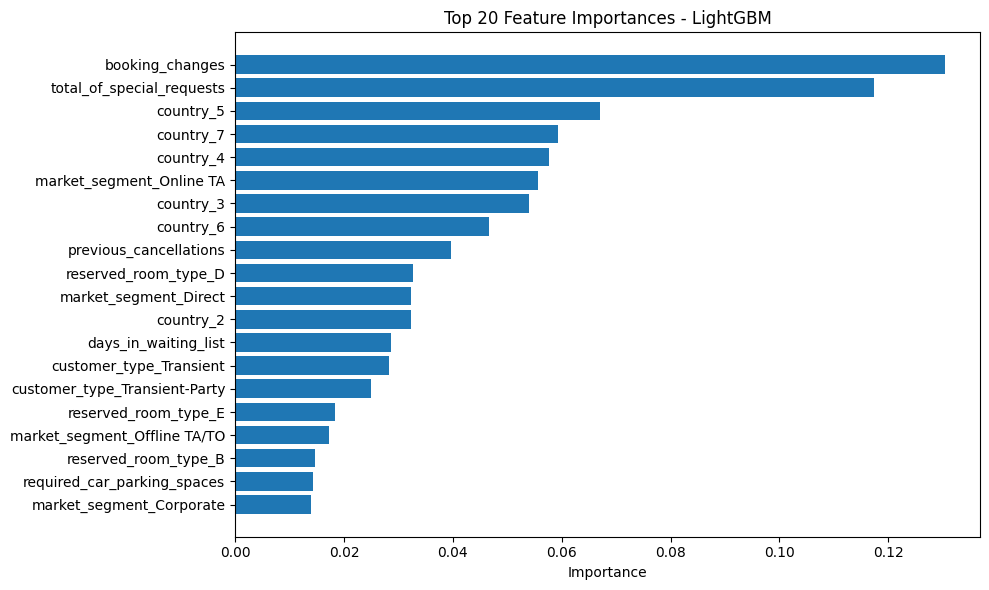

In [274]:
# Plot top 20 feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df.head(20)['Feature'][::-1], importance_df.head(20)['Normalized'][::-1])
plt.xlabel("Importance")
plt.title("Top 20 Feature Importances - LightGBM")
plt.tight_layout()
plt.show()